<a href="https://colab.research.google.com/github/ruvxn/FuelConsumption/blob/main/LinearRegression_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df=pd.read_csv(url)

In [5]:
# verify successful load with some randomly selected records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
596,2014,JEEP,WRANGLER 4X4 (2-DOOR),SUV - SMALL,3.6,6,A5,X,14.1,11.1,12.8,22,294
142,2014,BUICK,ENCORE,SUV - SMALL,1.4,4,AS6,X,9.5,7.2,8.5,33,196
788,2014,MINI,COOPER PACEMAN,COMPACT,1.6,4,A6,Z,9.4,7.9,8.7,32,200
293,2014,DODGE,AVENGER,MID-SIZE,2.4,4,A4,X,11.2,8.0,9.8,29,225
287,2014,CHRYSLER,300 AWD FFV,FULL-SIZE,3.6,6,A8,E,17.3,11.7,14.8,19,237


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
518,2.0,4,10.1,232
758,4.7,8,15.6,359
926,6.7,12,17.1,393
308,3.6,6,14.8,237
802,1.6,4,8.3,191
40,2.0,4,9.2,212
80,2.0,4,6.7,181
881,3.8,6,14.0,322
179,6.2,8,14.7,338


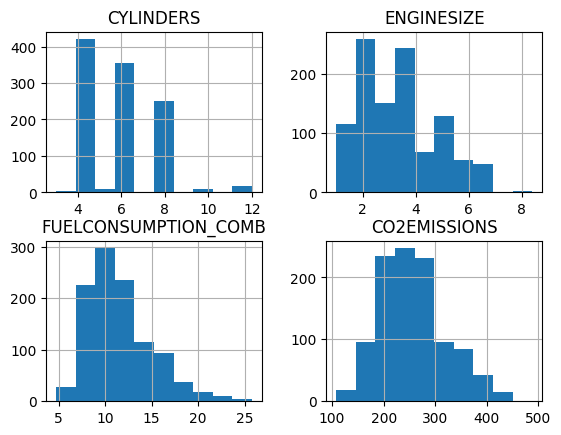

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

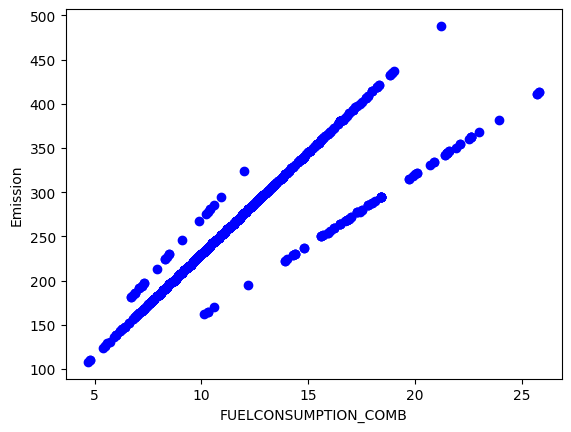

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

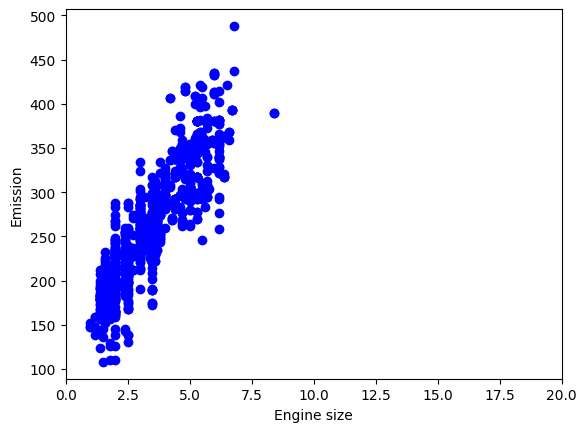

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,20)
plt.show()

Text(0.5, 1.0, 'Cylinders vs CO2 Emissions')

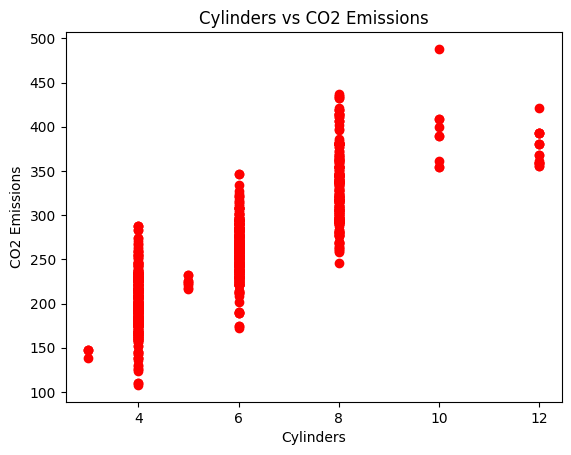

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.title("Cylinders vs CO2 Emissions")

An increaasing trend can be seen. When the number of cylinders is increasing the correlated CO2 emissions increase as well.

In [12]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [13]:

!pip uninstall numpy scipy scikit-learn -y


!pip install numpy scipy scikit-learn --upgrade --force-reinstall


Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached scikit_

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
type(X_train), np.shape(X_train)


(numpy.ndarray, (853,))

In [16]:
type(y_train), np.shape(y_train)


(numpy.ndarray, (853,))

**sklearn models expect a 2D array as input**

In [17]:
from sklearn import linear_model

simple_regression = linear_model.LinearRegression()

simple_regression.fit(X_train.reshape(-1,1), y_train)

print("coeffiecients:", simple_regression.coef_[0])
print("intercept:", simple_regression.intercept_)

coeffiecients: 38.992978724434074
intercept: 126.28970217408721


Text(0, 0.5, 'Emission')

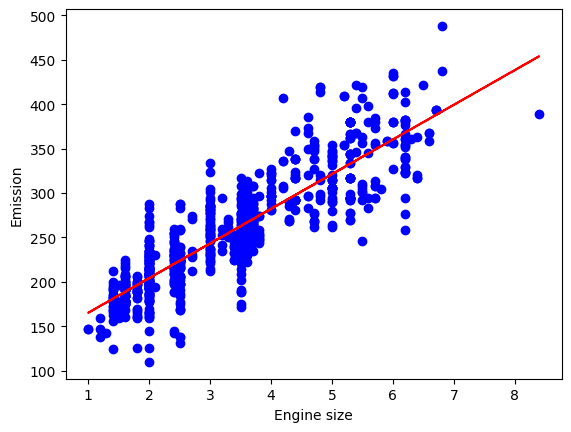

In [18]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, simple_regression.coef_*X_train + simple_regression.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

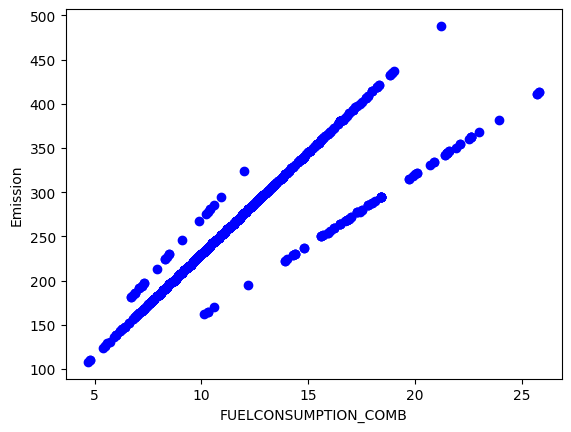

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

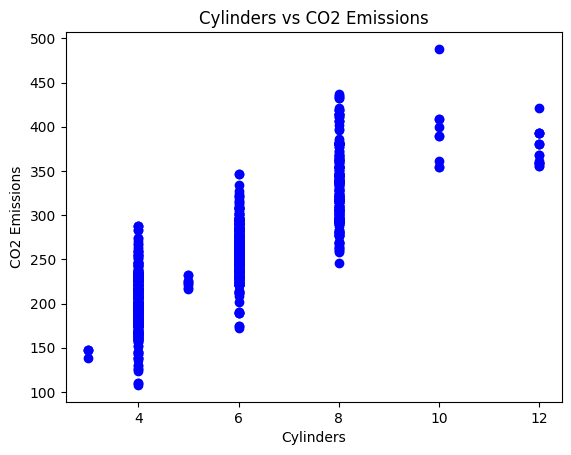

In [23]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.title("Cylinders vs CO2 Emissions")
plt.show()

In [24]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [26]:
type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

In [30]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

Coefficients = regressor.coef_[0]
Intercept = regressor.intercept_

print('Coefficients: ', Coefficients)
print('Intercept: ',Intercept)

Coefficients:  38.94345389767947
Intercept:  126.19497025374346


Text(0, 0.5, 'Emission')

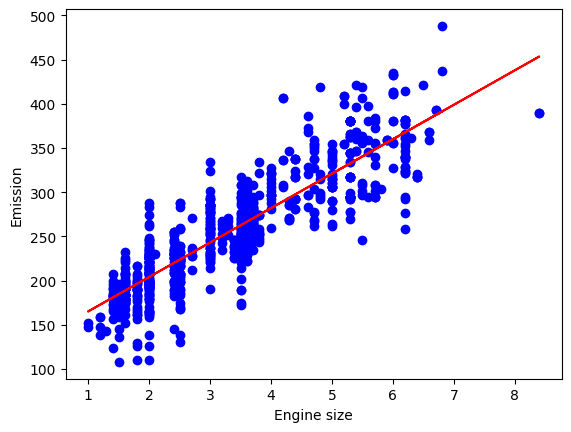

In [31]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, Coefficients*X_train + Intercept, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

y_test_ = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_,y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("root_mean_squared_error: %.2f" % root_mean_squared_error(y_test_,y_test))
print("R2-score: %.2f" % r2_score(y_test_, y_test))

Mean absolute error: 23.48
Mean squared error: 972.64
root_mean_squared_error: 31.19
R2-score: 0.65
